# Week 11 Lab
Win Tun Kyaw (1005265)

In [1]:
import networkx as nx
import matplotlib.pyplot as plt
import random

C:\Users\wintk\AppData\Local\Temp\ipykernel_18892\1144911077.py:17: DeprecationWarning: Sampling from a set deprecated
since Python 3.9 and will be removed in a subsequent version.
  outgoing_nodes = random.sample(set(range(num_nodes)) - {i}, num_outgoing_edges)


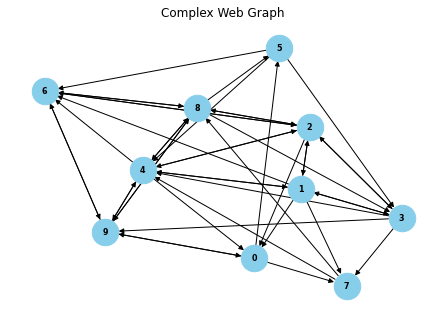

In [2]:
# Set a fixed random seed for reproducibility. Use your student id as a random seed

student_id = 1005265 # Change to your student id
random.seed(student_id)

# Create a directed graph
web_graph = nx.DiGraph()

# Add 10 nodes to the graph
num_nodes = 10
web_graph.add_nodes_from(range(num_nodes))

# Add random edges to make the graph complex
for i in range(num_nodes):
    # Connect each node to at least one other node
    num_outgoing_edges = random.randint(1, 6)
    outgoing_nodes = random.sample(set(range(num_nodes)) - {i}, num_outgoing_edges)
    web_graph.add_edges_from([(i, j) for j in outgoing_nodes])

# Draw the graph
pos = nx.spring_layout(web_graph)
nx.draw(web_graph, pos, with_labels=True, font_weight='bold', node_size=700, node_color='skyblue', font_size=8, arrowsize=10)

plt.title("Complex Web Graph")
plt.show()

# Question 1

In [3]:
# Question 1: Calculate pagerank of this network using networkx package. (1 mark for this)
pr = nx.pagerank(web_graph)
pr

{0: 0.08770095944440565,
 1: 0.06436634953134553,
 2: 0.11265963144669064,
 3: 0.07686121270435485,
 4: 0.14357444210881853,
 5: 0.05971292753097823,
 6: 0.12448365967679022,
 7: 0.06203378162699996,
 8: 0.14021717389013755,
 9: 0.12838986203947864}

# Question 2

In [4]:
# Question 2: Calculate the hits and hubs score of this network after three iterations using the algorithm explained in the class. Show your workings. (8 marks)

In [5]:
web_graph.in_edges

InEdgeView([(1, 0), (2, 0), (4, 0), (9, 0), (2, 1), (3, 1), (4, 1), (1, 2), (3, 2), (4, 2), (6, 2), (8, 2), (1, 3), (2, 3), (5, 3), (8, 3), (1, 4), (2, 4), (3, 4), (5, 4), (7, 4), (8, 4), (9, 4), (0, 5), (8, 5), (1, 6), (2, 6), (4, 6), (5, 6), (8, 6), (9, 6), (0, 7), (1, 7), (3, 7), (2, 8), (4, 8), (6, 8), (7, 8), (9, 8), (0, 9), (3, 9), (4, 9), (6, 9), (8, 9)])

In [6]:
web_graph.out_edges

OutEdgeView([(0, 7), (0, 5), (0, 9), (1, 3), (1, 2), (1, 4), (1, 7), (1, 0), (1, 6), (2, 4), (2, 6), (2, 8), (2, 3), (2, 1), (2, 0), (3, 4), (3, 1), (3, 9), (3, 7), (3, 2), (4, 0), (4, 9), (4, 8), (4, 6), (4, 2), (4, 1), (5, 3), (5, 6), (5, 4), (6, 9), (6, 8), (6, 2), (7, 8), (7, 4), (8, 5), (8, 9), (8, 6), (8, 2), (8, 3), (8, 4), (9, 6), (9, 8), (9, 4), (9, 0)])

At each iteration, the new authority score of a node is the sum of all the hub scores of nodes that point to it. Meanwhile, the new hub score of a node is the sum of all the authority scores of nodes that it points to.

Eg. All nodes initially have authority and hub scores of 1. Node 0 is pointed by nodes 1, 2, 4 and 9. It points to nodes 7, 5 and 9. Hence, its authority score is 4 and its hub score is 3. After updating the scores of all nodes, the sum of all the authority scores across all nodes is 44; likewise, the sum of all the hub scores is 44. Hence, after normalizing, the authority score for node 0 is 4/44 = 0.091 and the hub score for node 0 is 3/44 = 0.068.

The following table shows the authority score (a) and hub score (h) for all nodes at each iteration, after normalizing (corrected to 3sf).

| Node | a0 | h0 | a1 | h1 | a2 | h2 | a3 | h3 |
| --- | --- | --- | --- | --- | --- | --- | --- | --- |
| 0 | 1 | 1 | 0.091 | 0.068 | 0.1020 | 0.0467 | 0.1040 | 0.0443 |
| 1 | 1 | 1 | 0.068 | 0.136 | 0.0788 | 0.1350 | 0.0768 | 0.140 |
| 2 | 1 | 1 | 0.114 | 0.136 | 0.1200 | 0.1350 | 0.1190 | 0.138|
| 3 | 1 | 1 | 0.091 | 0.114 | 0.0971 | 0.1080 | 0.0994 | 0.108 |
| 4 | 1 | 1 | 0.159 | 0.136 | 0.1480 | 0.1310 | 0.1540 | 0.134 |
| 5 | 1 | 1 | 0.045 | 0.068 | 0.0416 | 0.0793 | 0.0374 | 0.0804 |
| 6 | 1 | 1 | 0.136 | 0.068 | 0.1430 | 0.0703 | 0.1470 | 0.0671 |
| 7 | 1 | 1 | 0.068 | 0.045 | 0.0649 | 0.0561 | 0.5960 | 0.0508 |
| 8 | 1 | 1 | 0.114 | 0.136 | 0.0971 | 0.1350 | 0.1020 | 0.136 |
| 9 | 1 | 1 | 0.114 | 0.091 | 0.1070 | 0.1030 | 0.1010 | 0.102|

# Question 3

In [7]:
# Question 3: Calculate the authority and hubs score of this network after three iterations using networkx package. (1 mark)
h, a = nx.hits(web_graph, max_iter=3)

C:\Users\wintk\anaconda3\lib\site-packages\networkx\algorithms\link_analysis\hits_alg.py:78: FutureWarning: adjacency_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.
  A = nx.adjacency_matrix(G, nodelist=list(G), dtype=float)


In [9]:
a

{0: 0.10620382566080855,
 1: 0.07704399898497545,
 2: 0.11752312483353879,
 3: 0.10215428033803449,
 4: 0.15533180778974118,
 5: 0.035361842046547375,
 6: 0.15067866131763002,
 7: 0.05773580242318576,
 8: 0.1013008175156752,
 9: 0.09666583908986319}

In [8]:
h

{0: 0.03890717498368263,
 1: 0.14139421033324515,
 2: 0.14202690968372894,
 3: 0.10339666133205218,
 4: 0.1331497076208739,
 5: 0.08368594964086443,
 6: 0.06468481660307944,
 7: 0.052617343821810145,
 8: 0.134851309240424,
 9: 0.10528591674023907}